# Regression Problem

In [2]:
# Load the data
import pandas as pd
df=pd.read_csv("boston.csv")

In [ ]:
df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,HOUSEPRICE
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
#!pip install pandas-profiling
!pip install ydata-profiling


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 392.1/392.1 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 94.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=2c0b1f429c4f035caef345018be499de0a1920dfa7391dede6275f038a21e387
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
!pip install pydantic-settings

# EDA

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
ProfileReport(df)

In [ ]:
# separating outcome and features
x=df.drop(columns='HOUSEPRICE')
y=df.HOUSEPRICE

# split the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

#Standardise data
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
st.fit(x_train)

x_train_std=st.transform(x_train)
x_test_std=st.transform(x_test)

In [ ]:
x_train_std

array([[-0.38774288,  0.42637011, -0.74491444, ...,  0.27878885,
         0.34049624,  0.82212111],
       [-0.39842849,  0.5525335 , -0.84901832, ...,  0.55287698,
         0.42774893, -0.46241699],
       [-0.39825738,  1.18335044, -0.66648002, ..., -0.40643148,
         0.34184377, -0.90310809],
       ...,
       [-0.39263969, -0.49882807, -0.15309105, ..., -0.31506877,
         0.40091059, -0.31227617],
       [-0.38313854, -0.49882807, -0.59517599, ..., -0.26938741,
         0.38103449,  0.86938766],
       [-0.39407658, -0.49882807, -1.003035  , ..., -0.86324503,
         0.42774893,  0.29801844]])

In [ ]:
x_train_std.shape

(379, 12)

In [ ]:
df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,HOUSEPRICE
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
!pip install livelossplot

In [ ]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from livelossplot import PlotLossesKerasTF

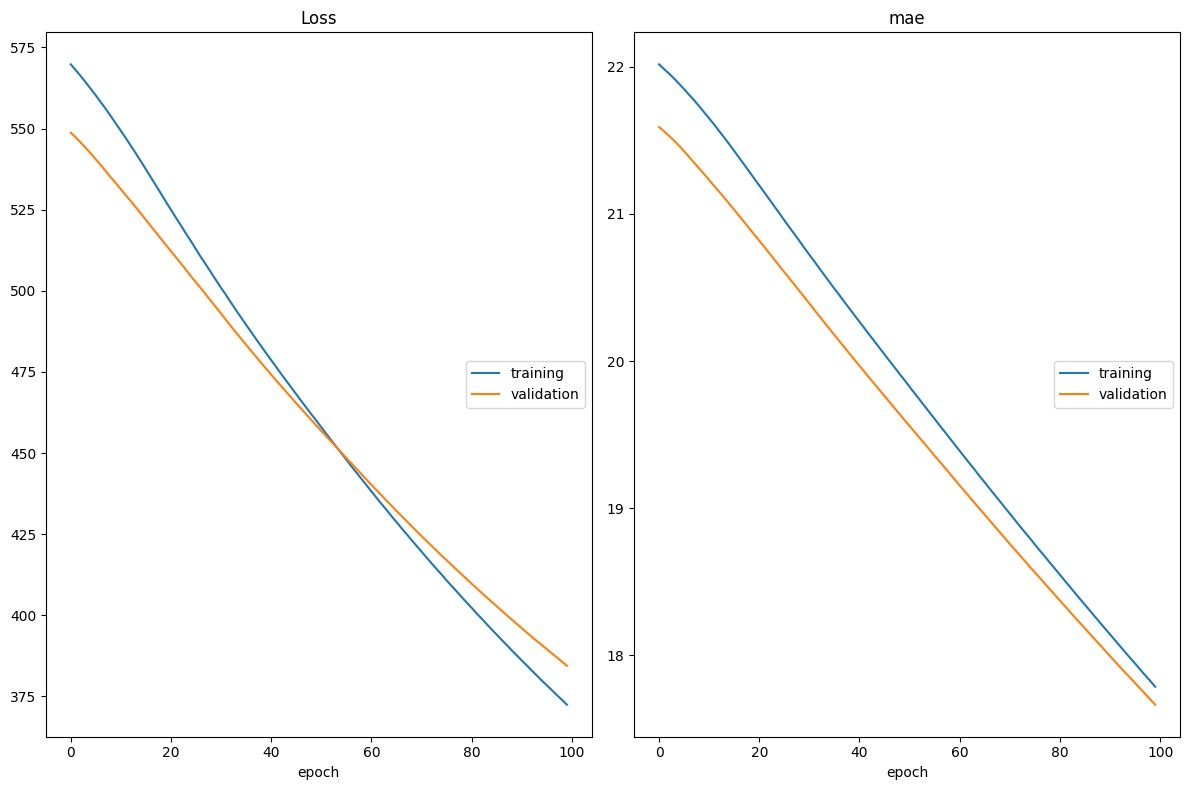

Loss
	training         	 (min:  372.460, max:  569.780, cur:  372.460)
	validation       	 (min:  384.481, max:  548.721, cur:  384.481)
mae
	training         	 (min:   17.787, max:   22.017, cur:   17.787)
	validation       	 (min:   17.665, max:   21.591, cur:   17.665)
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 358.1733 - mae: 17.6393 - val_loss: 384.4806 - val_mae: 17.6653


In [ ]:
# Perceptron
model=Sequential()

model.add(Input(shape=(12,),name="Input Layer"))
model.add(Dense(1,activation='relu',name='OutputLayer'))

model.compile(loss='mse',optimizer='adam',metrics=['mae'])

# train the model
model.fit(x_train_std,y_train,epochs=100,validation_data=(x_test_std,y_test),callbacks=[PlotLossesKerasTF()])

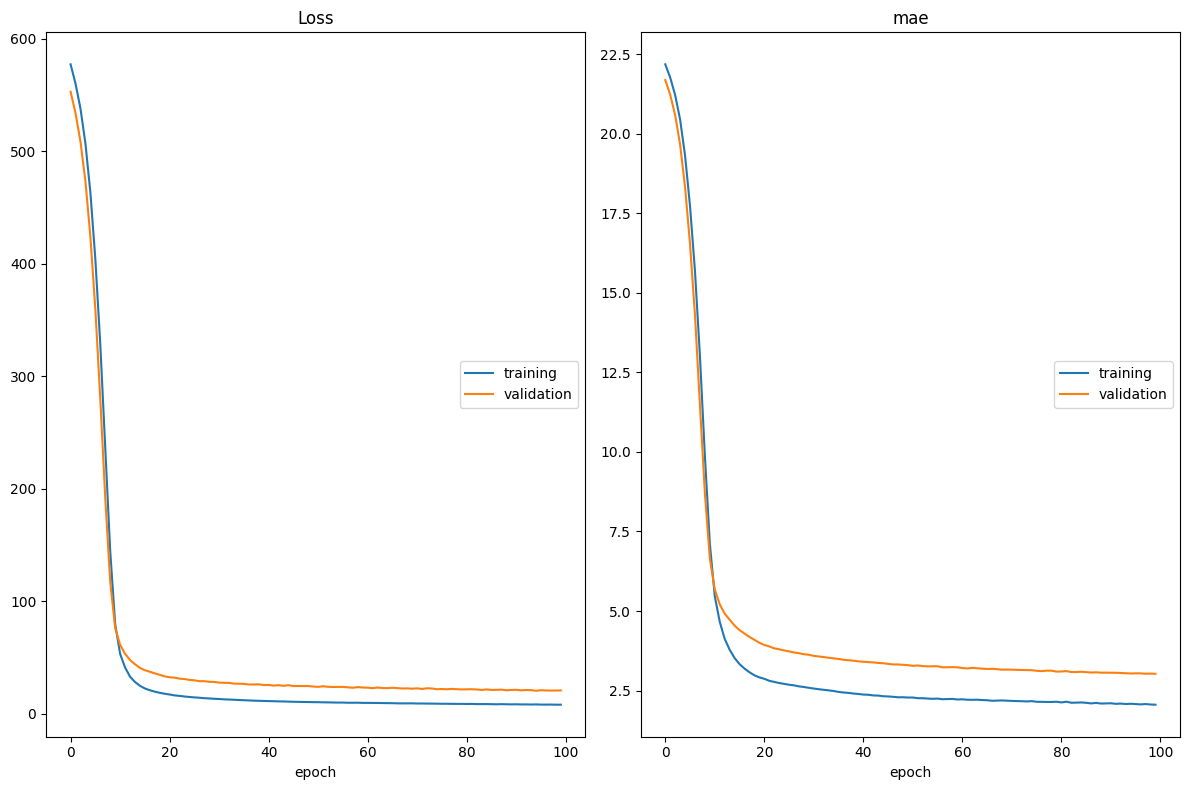

Loss
	training         	 (min:    7.892, max:  577.043, cur:    7.892)
	validation       	 (min:   20.278, max:  552.666, cur:   20.541)
mae
	training         	 (min:    2.057, max:   22.179, cur:    2.057)
	validation       	 (min:    3.028, max:   21.686, cur:    3.028)
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 8.7796 - mae: 2.1331 - val_loss: 20.5406 - val_mae: 3.0279


In [ ]:
# Deep Neural Network
nn=Sequential()
nn.add(Input(shape=(12,),name="Input Layer"))

nn.add(Dense(15,activation='relu',name="Hidden1"))
nn.add(Dense(20,activation='relu',name="Hidden2"))
nn.add(Dense(20,activation='relu',name="Hidden3"))

nn.add(Dense(1,activation='relu',name='OutputLayer'))
nn.compile(loss='mse',optimizer='adam',metrics=['mae'])

# train the model
nn.fit(x_train_std,y_train,epochs=100,validation_data=(x_test_std,y_test),callbacks=[PlotLossesKerasTF()])

In [ ]:
nn.predict(x_test_std)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[23.565327 ],
       [27.13651  ],
       [24.075401 ],
       [10.347653 ],
       [18.302847 ],
       [19.064331 ],
       [24.892626 ],
       [21.56127  ],
       [19.685493 ],
       [16.158844 ],
       [11.147212 ],
       [11.09037  ],
       [14.343489 ],
       [ 9.78707  ],
       [46.46606  ],
       [33.262497 ],
       [25.903498 ],
       [39.448822 ],
       [29.848255 ],
       [22.288347 ],
       [23.586348 ],
       [20.944998 ],
       [20.521872 ],
       [26.83847  ],
       [23.31906  ],
       [23.946455 ],
       [17.00842  ],
       [15.959372 ],
       [43.53151  ],
       [16.79813  ],
       [15.691668 ],
       [17.904533 ],
       [16.087444 ],
       [17.33653  ],
       [26.104849 ],
       [18.76509  ],
       [ 6.89015  ],
       [27.139965 ],
       [13.92708  ],
       [12.037283 ],
       [25.116516 ],
       [23.164177 ],
       [20.333372 ],
       [17.812752 ],
       [21.008102 ],
       [24.28532  ],
       [19.201258 ],
       [18.19

In [ ]:
# save model
nn.save("BostonModel.keras")

In [ ]:
from tensorflow.keras.models import load_model
new_model = load_model('/content/BostonModel.keras')

In [ ]:
df_new=pd.read_csv("boston new data.csv")

In [ ]:
df_new

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.653,16,2.2,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98
1,0.005,0,3.4,0,0.600,7.000,45.0,5.00,2,300,17.0,300.0,6.00


In [ ]:
df_new.drop(columns="CHAS",inplace=True)

In [ ]:
df_new_std=st.transform(df_new)

In [ ]:
new_model.predict(df_new_std)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


array([[26.857536],
       [25.270016]], dtype=float32)